In [4]:
import pandas as pd
import pandas.io.data as web

import numpy as np
import datetime

msft = pd.read_csv("msft.csv", index_col=0, parse_dates=True)
aapl = pd.read_csv("aapl.csv", index_col=0, parse_dates=True)

In [5]:
msft['2012-01']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,64731500,23.304317
2012-01-04,26.820000,27.469999,26.780001,27.400000,80516100,23.852755
2012-01-05,27.379999,27.730000,27.290001,27.680000,56081400,24.096507
2012-01-06,27.530001,28.190001,27.530001,28.110001,99455500,24.470839
2012-01-09,28.049999,28.100000,27.719999,27.740000,59706800,24.148739
2012-01-10,27.930000,28.150000,27.750000,27.840000,60014400,24.235793
2012-01-11,27.430000,27.980000,27.370001,27.719999,65582400,24.131328
2012-01-12,27.870001,28.020000,27.650000,28.000000,49370800,24.375079
2012-01-13,27.930000,28.250000,27.790001,28.250000,60196100,24.592714


('Buy', 18.0)
2012-01-03 00:00:00 1003.912228
('Sell', 18.0)
2012-01-04 00:00:00 1004.692438
('Buy', 18.0)
2012-01-05 00:00:00 1009.9055429
('Buy', 18.0)
2012-01-06 00:00:00 1027.96591573
('Sell', 18.0)
2012-01-09 00:00:00 1020.16879397
('Buy', 18.0)
2012-01-10 00:00:00 1020.22717082
('Sell', 36.0)
2012-01-11 00:00:00 1005.36595882
('Buy', 18.0)
2012-01-12 00:00:00 1007.51805346
('Sell', 1.0)
2012-01-17 00:00:00 1011.99037587
('Buy', 18.0)
2012-01-19 00:00:00 1008.69409713
('Sell', 18.0)
2012-01-23 00:00:00 1061.73743411
('Buy', 18.0)
2012-01-24 00:00:00 1052.63819687
('Sell', 18.0)
2012-01-25 00:00:00 1051.46232809
('Sell', 17.0)
2012-01-26 00:00:00 1052.18682751
('Buy', 35.0)
2012-01-27 00:00:00 1044.23958232
('Sell', 18.0)
2012-01-30 00:00:00 1045.95872728
('Sell', 17.0)
2012-01-31 00:00:00 1046.68396105
('Buy', 35.0)
2012-02-02 00:00:00 1048.04260297
('Sell', 1.0)
2012-02-03 00:00:00 1058.08958138
('Sell', 17.0)
2012-02-06 00:00:00 1053.94624755
('Sell', 17.0)
2012-02-07 00:00:00 1

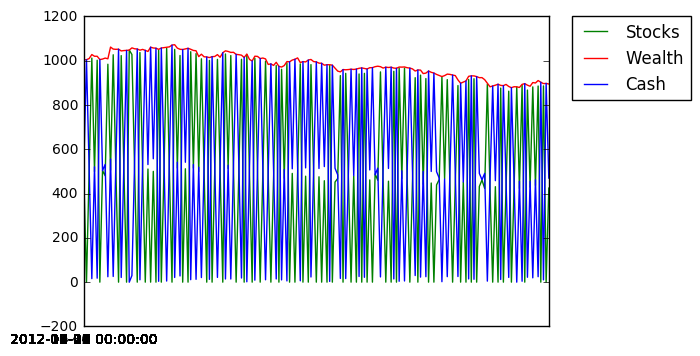

In [15]:
##  TASKS 1, 2 & 3 (without short selling)


import matplotlib.pyplot as plt
import numpy as np
InitialCash = 1000

Position = {'Cash': InitialCash, 'Stocks': 0.0} 



wealth_t=[]
stock_t=[]
cash_t=[]
used_date=[]

def DecideTargetPosition():
    ## Randomly decide a portfolio output percentage of capital to put into stocks
    return np.random.choice([0.0, 0.5, 1.0])        
        
def Capital(price):
    return Position['Cash'] + Position['Stocks']*price
        
def PlaceOrder(price):
    p = DecideTargetPosition()
    capital = Capital(price)
        
    numLots = np.floor(capital*p/price)
        
    TargetPosition = {'Cash': capital-numLots*price, 'Stocks': numLots}
        
    if TargetPosition['Stocks'] > Position['Stocks']:
        # Buy 
        order = ('Buy', TargetPosition['Stocks']-Position['Stocks'])
        return order
    elif TargetPosition['Stocks'] < Position['Stocks']:
        # Sell
        order = ('Sell', -TargetPosition['Stocks']+Position['Stocks'])
        return order
    else:
        # Do nothing
        None
            
def UpdatePosition(deltaCash, deltaStock):
    Position['Cash'] += deltaCash
    Position['Stocks'] += deltaStock
    return


def BackTester1(series, interest_rate, transaction_fee):
    
    openPrice = series['Open']
    closePrice = series['Close']
    alldates=openPrice.keys()
    
    for k in openPrice.keys():
        price = openPrice[k]
        cprice = closePrice[k]
        order = PlaceOrder(price) 
        date1=pd.tslib.Timestamp.to_datetime(k)
        #TASK 2 and 3 - Adding or withdrawing Capital and adding interest income
        metin = str(k) + ". day, how much Capital would you like to add/withraw?"
#        add_withdrawCapital=float(raw_input(metin))
#        while (Capital(price) + add_withdrawCapital) < 0:
#            add_withdrawCapital=float(raw_input("You wanted to withdraw more money than your portfolio has. Please try again"))     
        if ((date1) - alldates[0]).days == 0:
            accrued_day = 0
        else:
            accrued_day = (date2-date1).days
        date2=pd.tslib.Timestamp.to_datetime(k)                  
        Position['Cash']=(Position['Cash']*(1+interest_rate*accrued_day/365))
        # end of TASK 2
        if order is None:
            continue
            
        print order
        
        if order[0]=='Buy':
            deltaCash = -price*order[1]*(1+transaction_fee)
            deltaStock = order[1]
            UpdatePosition(deltaCash, deltaStock)
        elif order[0]=='Sell':
            deltaCash = price*order[1]*(1-transaction_fee)
            deltaStock = -order[1]            
            UpdatePosition(deltaCash, deltaStock)
        else:
            None
            
        price = closePrice[k]
        print k, Capital(price)
        cash_t.append(Position['Cash'])
        wealth_t.append(Capital(price))
        used_date.append(k)




InitialCash = 1000
Position = {'Cash': InitialCash, 'Stocks': 0.0} 

BackTester1(msft['2012'], 0.05, 0.0001)

cash_a = np.array(cash_t)
wealth_a = np.array(wealth_t)
stock_a = wealth_a - cash_a
datess = np.array(used_date)
plt.plot(stock_a, 'g', label='Stocks')
plt.xticks(stock_a, datess)
plt.plot(wealth_a, 'r', label='Wealth')
#plt.xticks(wealth_a, datess)
plt.plot(cash_a, 'b', label='Cash')
#plt.xticks(cash_a, datess)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(axis='x', linestyle='-')
plt.show()


('Buy', 37.0)
2012-01-03 00:00:00 1008.041802
('Sell', 56.0)
2012-01-05 00:00:00 1024.70101763
('Sell', 28.0)
2012-01-06 00:00:00 1008.16485562
('Buy', 17.0)
2012-01-09 00:00:00 1002.4328733
('Sell', 17.0)
2012-01-10 00:00:00 1005.54267272
('Sell', 28.0)
2012-01-11 00:00:00 997.130535155
('Buy', 35.0)
2012-01-12 00:00:00 1001.44636193
('Sell', 53.0)
2012-01-13 00:00:00 993.034545069
('Buy', 34.0)
2012-01-17 00:00:00 987.633856552
('Sell', 17.0)
2012-01-19 00:00:00 983.498661272
('Sell', 43.0)
2012-01-20 00:00:00 971.988257364
('Buy', 32.0)
2012-01-24 00:00:00 967.201443781
('Sell', 16.0)
2012-01-25 00:00:00 966.351036131
('Sell', 16.0)
2012-01-26 00:00:00 967.036104314
('Sell', 17.0)
2012-01-27 00:00:00 970.543894613
('Sell', 26.0)
2012-01-30 00:00:00 953.352680958
('Sell', 25.0)
2012-01-31 00:00:00 956.324084698
('Buy', 16.0)
2012-02-01 00:00:00 957.745385397
('Buy', 15.0)
2012-02-03 00:00:00 964.668844053
('Sell', 16.0)
2012-02-06 00:00:00 960.809621116
('Buy', 16.0)
2012-02-07 00:00

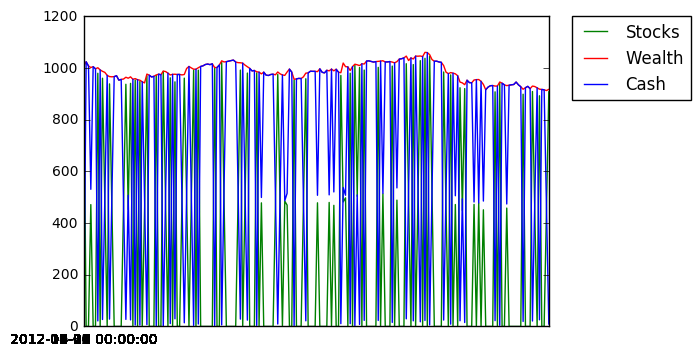

In [16]:
##  TASKS 4 - Allowing Open selling.


import matplotlib.pyplot as plt
import numpy as np
InitialCash = 1000
interest_rate=0.1
Position = {'Cash': InitialCash, 'Stocks': 0.0} 



wealth_t=[]
stock_t=[]
cash_t=[]
used_date=[]

def DecideTargetPosition():
    ## Randomly decide a portfolio output percentage of capital to put into stocks
    #TASK 4 - Allowing open selling with -0.75 and -0.5 positions
    return np.random.choice([-0.75, -0.5, 0.0, 0.5, 1.0])        
        
def Capital(price):
    return Position['Cash'] + Position['Stocks']*price
        
def PlaceOrder(price):
    p = DecideTargetPosition()
    capital = Capital(price)
        
    numLots = np.floor(capital*p/price)
        
    TargetPosition = {'Cash': capital-numLots*price, 'Stocks': numLots}
        
    if TargetPosition['Stocks'] > Position['Stocks']:
        # Buy 
        order = ('Buy', TargetPosition['Stocks']-Position['Stocks'])
        return order
    elif TargetPosition['Stocks'] < Position['Stocks']:
        # Sell
        order = ('Sell', -TargetPosition['Stocks']+Position['Stocks'])
        return order
    else:
        # Do nothing
        None

        
def UpdatePosition(deltaCash, deltaStock):
    Position['Cash'] += deltaCash
    Position['Stocks'] += deltaStock
    return


def BackTester1(series, interest_rate, transaction_fee):
    
    openPrice = series['Open']
    closePrice = series['Close']
    alldates=openPrice.keys()
    
    for k in openPrice.keys():
        price = openPrice[k]
        cprice = closePrice[k]
        order = PlaceOrder(price) 
        date1=pd.tslib.Timestamp.to_datetime(k)
        #TASK 2 and 3 - Adding or withdrawing Capital and adding interest income
#        metin = str(k) + ". day, how much Capital would you like to add/withraw?"
#        add_withdrawCapital=float(raw_input(metin))
#        while (Capital(price) + add_withdrawCapital) < 0:
#            add_withdrawCapital=float(raw_input("You wanted to withdraw more money than your portfolio has. Please try again"))     
        if ((date1) - alldates[0]).days == 0:
            accrued_day = 0
        else:
            accrued_day = (date2-date1).days
        date2=pd.tslib.Timestamp.to_datetime(k)                  
        Position['Cash']=(Position['Cash']*(1+interest_rate*accrued_day/365))
        # end of TASK 2
        if order is None:
            continue
            
        print order
        
        if order[0]=='Buy':
            deltaCash = -price*order[1]*(1+transaction_fee)
            deltaStock = order[1]
            UpdatePosition(deltaCash, deltaStock)
        elif order[0]=='Sell':
            deltaCash = price*order[1]*(1-transaction_fee)
            deltaStock = -order[1]            
            UpdatePosition(deltaCash, deltaStock)
        else:
            None
        
        price = closePrice[k]
        #TASK 4 - closing positions from open selling.
        if Position['Stocks'] < 0:
            Position['Cash'] = Position['Cash'] + Position['Stocks']*cprice*(1+transaction_fee)
            Position['Stocks'] = 0
        print k, Capital(price)
        cash_t.append(Position['Cash'])
        wealth_t.append(Capital(price))
        used_date.append(k)




InitialCash = 1000
Position = {'Cash': InitialCash, 'Stocks': 0.0} 

BackTester1(msft['2012'], 0.05, 0.0001)

cash_a = np.array(cash_t)
wealth_a = np.array(wealth_t)
stock_a = wealth_a - cash_a
datess = np.array(used_date)
plt.plot(stock_a, 'g', label='Stocks')
plt.xticks(stock_a, datess)
plt.plot(wealth_a, 'r', label='Wealth')
#plt.xticks(wealth_a, datess)
plt.plot(cash_a, 'b', label='Cash')
#plt.xticks(cash_a, datess)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(axis='x', linestyle='-')
plt.show()


('Buy', 26.0)
2014-01-02 00:00:00 994.962942005
('Sell', 53.0)
2014-01-16 00:00:00 976.993663414
('Sell', 27.0)
2014-01-17 00:00:00 988.812188658
('Sell', 27.0)
2014-01-21 00:00:00 1005.62335477
('Buy', 27.0)
2014-01-22 00:00:00 996.477750147
('Sell', 55.0)
2014-01-24 00:00:00 1055.12151059
('Sell', 29.0)
2014-01-27 00:00:00 1078.83648902
('Buy', 29.0)
2014-01-28 00:00:00 1082.9339842
('Sell', 59.0)
2014-01-30 00:00:00 1095.57785114
('Sell', 30.0)
2014-01-31 00:00:00 1068.50343198
('Sell', 29.0)
2014-02-03 00:00:00 1104.38914097
('Sell', 30.0)
2014-02-04 00:00:00 1122.61798479
('Buy', 30.0)
2014-02-05 00:00:00 1108.2553015
('Sell', 61.0)
2014-02-11 00:00:00 1130.69757519
('Sell', 31.0)
2014-02-12 00:00:00 1126.59065011
('Sell', 31.0)
2014-02-13 00:00:00 1117.52403962
('Sell', 30.0)
2014-02-14 00:00:00 1110.24592414
('Sell', 30.0)
2014-02-18 00:00:00 1115.71251021
('Sell', 30.0)
2014-02-19 00:00:00 1106.63557288
('Sell', 30.0)
2014-02-20 00:00:00 1100.85801897
('Sell', 30.0)
2014-02-21 

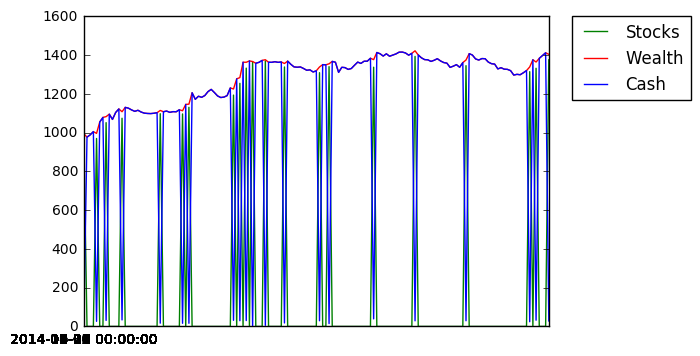

In [21]:
#  TASK 5 - implementing a trading policy


import matplotlib.pyplot as plt
import numpy as np
InitialCash = 1000
interest_rate=0.1
Position = {'Cash': InitialCash, 'Stocks': 0.0} 



wealth_t=[]
stock_t=[]
cash_t=[]
used_date=[]

def DecideTargetPosition(price, compare):
    ## I used Momentum effect as a trading model.
    ## If opening price is higher than +1% of the moving average w (5 terms), model buys stock. 
    ## If price is between +- %1 of moving average range, it sells stock. 
    ## If price is lesser than 99% of moving average, it sells the stock. 
        if price <= compare*1.01 :
            ret = 1
        elif price >= compare*0.99:
            ret = -1
        else:
            ret = 0
        return ret
        
def Capital(price):
    return Position['Cash'] + Position['Stocks']*price
        
def PlaceOrder(price, compare):
    p = DecideTargetPosition(price, compare)
    capital = Capital(price)
        
    numLots = np.floor(capital*p/price)
        
    TargetPosition = {'Cash': capital-numLots*price, 'Stocks': numLots}
        
    if TargetPosition['Stocks'] > Position['Stocks']:
        # Buy 
        order = ('Buy', TargetPosition['Stocks']-Position['Stocks'])
        return order
    elif TargetPosition['Stocks'] < Position['Stocks']:
        # Sell
        order = ('Sell', -TargetPosition['Stocks']+Position['Stocks'])
        return order
    else:
        # Do nothing
        None

        
def UpdatePosition(deltaCash, deltaStock):
    Position['Cash'] += deltaCash
    Position['Stocks'] += deltaStock
    return


def BackTester1(series, interest_rate, transaction_fee):
    
    openPrice = series['Open']
    closePrice = series['Close']
    alldates=openPrice.keys()
    mu = 0
    w = 20
    movaverage=[]
    n = 0
    for k in openPrice.keys():
        price = openPrice[k]
        cprice = closePrice[k]
        i = (openPrice.keys().get_loc(k))
        # Implementing an algorithm to calculate moving average for "w" period.
        mu = mu + price
        if i>=w:
            mu = mu - openPrice[openPrice.keys()[(i-w)]]
        else:
            n = n + 1
        movaverage.append(mu/n)
        compare = movaverage[i]
        order = PlaceOrder(price, compare) 
        date1=pd.tslib.Timestamp.to_datetime(k)
        #TASK 2 and 3 - Adding or withdrawing Capital and adding interest income
        metin = str(k) + ". day, how much Capital would you like to add/withraw?"
#        add_withdrawCapital=float(raw_input(metin))
#        while (Capital(price) + add_withdrawCapital) < 0:
#            add_withdrawCapital=float(raw_input("You wanted to withdraw more money than your portfolio has. Please try again"))     
        if ((date1) - alldates[0]).days == 0:
            accrued_day = 0
        else:
            accrued_day = (date2-date1).days
        date2=pd.tslib.Timestamp.to_datetime(k)                  
        Position['Cash']=(Position['Cash']*(1+interest_rate*accrued_day/365))
        # end of TASK 2
        if order is None:
            continue
            
        print order
        
        if order[0]=='Buy':
            deltaCash = -price*order[1]*(1+transaction_fee)
            deltaStock = order[1]
            UpdatePosition(deltaCash, deltaStock)
        elif order[0]=='Sell':
            deltaCash = price*order[1]*(1-transaction_fee)
            deltaStock = -order[1]            
            UpdatePosition(deltaCash, deltaStock)
        else:
            None
        
        price = closePrice[k]
        #TASK 4 - closing positions from open selling.
        if Position['Stocks'] < 0:
            Position['Cash'] = Position['Cash'] + Position['Stocks']*cprice*(1+transaction_fee)
            Position['Stocks'] = 0
        print k, Capital(price)
        cash_t.append(Position['Cash'])
        wealth_t.append(Capital(price))
        used_date.append(k)




InitialCash = 1000
Position = {'Cash': InitialCash, 'Stocks': 0.0} 

BackTester1(msft['2014'], 0.05, 0.0001)

cash_a = np.array(cash_t)
wealth_a = np.array(wealth_t)
stock_a = wealth_a - cash_a
datess = np.array(used_date)
plt.plot(stock_a, 'g', label='Stocks')
plt.xticks(stock_a, datess)
plt.plot(wealth_a, 'r', label='Wealth')
#plt.xticks(wealth_a, datess)
plt.plot(cash_a, 'b', label='Cash')
#plt.xticks(cash_a, datess)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(axis='x', linestyle='-')
plt.show()
